In [78]:
# Establish Dependencies
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as st
from pprint import pprint
import numpy as np 

# Set csv location into variable
heart_data = "Resources/heart_data.csv"

# Use Pandas csv reader to review data
heart_data = pd.read_csv(heart_data)

# Rename columns 
heart_data.columns = ['Age', 'Sex', 'Chest Pain', 'Resting Blood Pressure', 'Cholesterol (mg/dl)', 'Fasting Blood Sugar > 120', 'Rest (ECG)', 'Max Heart Rate', 'Exercise Induced Angina', 'ST Depression Induced', 'Slope', 'Number of Major Vessels (ca)', 'NST Result', 'Target']

heart_data.head()

,Age,Sex,Chest Pain,Resting Blood Pressure,Cholesterol (mg/dl),Fasting Blood Sugar > 120,Rest (ECG),Max Heart Rate,Exercise Induced Angina,ST Depression Induced,Slope,Number of Major Vessels (ca),NST Result,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
#Replace numbers on 'Sex' column with its corresponding strings value
heart_data['Sex']=heart_data['Sex'].replace(0, 'Female')
heart_data['Sex']=heart_data['Sex'].replace(1, 'Male')

#Replace numbers on 'Fasting Blood Sugar' column with its corresponding strings value
heart_data['Fasting Blood Sugar > 120']=heart_data['Fasting Blood Sugar > 120'].replace(0,"False")
heart_data['Fasting Blood Sugar > 120']=heart_data['Fasting Blood Sugar > 120'].replace(1,"True")

#Replace numbers on 'ex Agina' column with its corresponding strings value
heart_data['Exercise Induced Angina']=heart_data['Exercise Induced Angina'].replace(0,"No")
heart_data['Exercise Induced Angina']=heart_data['Exercise Induced Angina'].replace(1,"Yes")

#Replace numbers on 'Thal' column with its corresponding strings value
heart_data['NST Result']=heart_data['NST Result'].replace(1,"Normal")
heart_data['NST Result']=heart_data['NST Result'].replace(2,"Fixed Defect")
heart_data['NST Result']=heart_data['NST Result'].replace(3,"Reversible Defect")

#Replace numbers on 'Chest Pain' column with its corresponding strings value
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(0,"Asymptomatic")
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(1,"Atypical angina")
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(2,"Non-anginal pain")
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(3,"Typical angina")

#Replace numbers on 'Target' column with its corresponding strings value
heart_data['Target']=heart_data['Target'].replace(0,"Disease")
heart_data['Target']=heart_data['Target'].replace(1,"No disease")

#Replace numbers on 'Rest (ECG)' column with its corresponding strings value
heart_data['Rest (ECG)']=heart_data['Rest (ECG)'].replace(0,"Probable ventricular hypertrophy ")
heart_data['Rest (ECG)']=heart_data['Rest (ECG)'].replace(1,"Normal")
heart_data['Rest (ECG)']=heart_data['Rest (ECG)'].replace(2,"ST-T wave abnormality")

#Replace numbers on 'Slope' column with its corresponding strings value
heart_data['Slope']=heart_data['Slope'].replace(0,"Downsloping")
heart_data['Slope']=heart_data['Slope'].replace(1,"Flat")
heart_data['Slope']=heart_data['Slope'].replace(2,"Upsloping")

heart_data.head()

,Age,Sex,Chest Pain,Resting Blood Pressure,Cholesterol (mg/dl),Fasting Blood Sugar > 120,Rest (ECG),Max Heart Rate,Exercise Induced Angina,ST Depression Induced,Slope,Number of Major Vessels (ca),NST Result,Target
0,63,Male,Typical angina,145,233,True,Probable ventricular hypertrophy,150,No,2.3,Downsloping,0,Normal,No disease
1,37,Male,Non-anginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Fixed Defect,No disease
2,41,Female,Atypical angina,130,204,False,Probable ventricular hypertrophy,172,No,1.4,Upsloping,0,Fixed Defect,No disease
3,56,Male,Atypical angina,120,236,False,Normal,178,No,0.8,Upsloping,0,Fixed Defect,No disease
4,57,Female,Asymptomatic,120,354,False,Normal,163,Yes,0.6,Upsloping,0,Fixed Defect,No disease


In [80]:
#remove all value 0 on NST Result
heart_data = heart_data[heart_data['NST Result'] != 0]

#remove all value 4 on ca 'Number of Major Vessels (ca)'
heart_data = heart_data[heart_data['Number of Major Vessels (ca)'] != 4]

heart_data.head(10)

,Age,Sex,Chest Pain,Resting Blood Pressure,Cholesterol (mg/dl),Fasting Blood Sugar > 120,Rest (ECG),Max Heart Rate,Exercise Induced Angina,ST Depression Induced,Slope,Number of Major Vessels (ca),NST Result,Target
0,63,Male,Typical angina,145,233,True,Probable ventricular hypertrophy,150,No,2.3,Downsloping,0,Normal,No disease
1,37,Male,Non-anginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Fixed Defect,No disease
2,41,Female,Atypical angina,130,204,False,Probable ventricular hypertrophy,172,No,1.4,Upsloping,0,Fixed Defect,No disease
3,56,Male,Atypical angina,120,236,False,Normal,178,No,0.8,Upsloping,0,Fixed Defect,No disease
4,57,Female,Asymptomatic,120,354,False,Normal,163,Yes,0.6,Upsloping,0,Fixed Defect,No disease
5,57,Male,Asymptomatic,140,192,False,Normal,148,No,0.4,Flat,0,Normal,No disease
6,56,Female,Atypical angina,140,294,False,Probable ventricular hypertrophy,153,No,1.3,Flat,0,Fixed Defect,No disease
7,44,Male,Atypical angina,120,263,False,Normal,173,No,0.0,Upsloping,0,Reversible Defect,No disease
8,52,Male,Non-anginal pain,172,199,True,Normal,162,No,0.5,Upsloping,0,Reversible Defect,No disease
9,57,Male,Non-anginal pain,150,168,False,Normal,174,No,1.6,Upsloping,0,Fixed Defect,No disease


In [81]:
disease_df = heart_data[heart_data['Target'] == 'Disease']
no_disease_df = heart_data[heart_data['Target'] == 'No disease']

Text(0.5, 1.0, 'Distribution of Age')

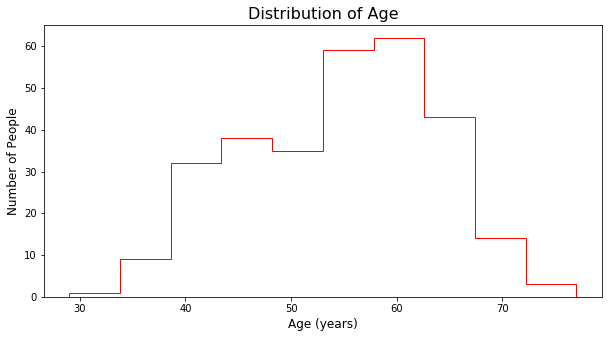

In [82]:
ages = heart_data['Age']
plt.figure(figsize=(10,5))
plt.hist(ages, histtype = 'step', color='red')
plt.xlabel('Age (years)', fontsize = 12)
plt.ylabel('Number of People', fontsize = 12)
plt.title('Distribution of Age', fontsize = 16)

Text(0.5, 1.0, 'Distribution of Age (Disease vs. No Disease)')

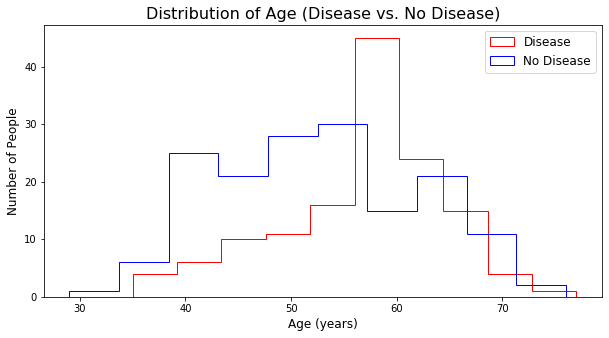

In [104]:
disease_ages = disease_df['Age']
no_disease_ages = no_disease_df['Age']
plt.figure(figsize=(10,5))
plt.hist(disease_ages, histtype = 'step', color='red')
plt.hist(no_disease_ages, histtype = 'step', color='blue')
plt.legend(['Disease', 'No Disease'], fontsize = 12)
plt.xlabel('Age (years)', fontsize = 12)
plt.ylabel('Number of People', fontsize = 12)
plt.title('Distribution of Age (Disease vs. No Disease)', fontsize = 16)

In [110]:
grouped_df = heart_data.groupby('Target')
sex_df = pd.DataFrame(grouped_df['Sex'].value_counts())
sex_df

Sex
Target     Sex        
Disease    Male    112
           Female   24
No disease Male     89
           Female   71

Text(0.5, 1.0, 'Distribution of Max Heart Rates (Disease vs. No Disease)')

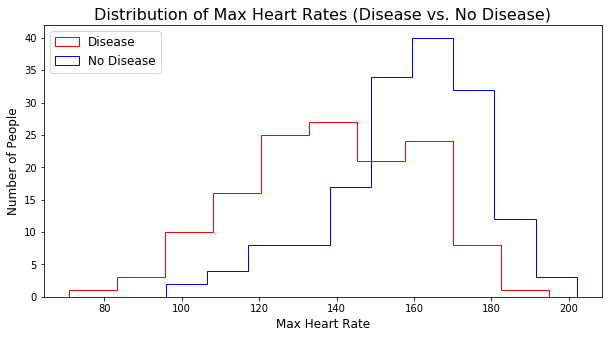

In [89]:
disease_max_HR = disease_df['Max Heart Rate']
no_disease_max_HR = no_disease_df['Max Heart Rate']
plt.figure(figsize=(10,5))
plt.hist(disease_max_HR, histtype = 'step', color='red')
plt.hist(no_disease_max_HR, histtype = 'step', color='blue')
plt.legend(['Disease', 'No Disease'], fontsize = 12)
plt.xlabel('Max Heart Rate', fontsize = 12)
plt.ylabel('Number of People', fontsize = 12)
plt.title('Distribution of Max Heart Rates (Disease vs. No Disease)', fontsize = 16)

Text(0.5, 1.0, 'Gender Distribution')

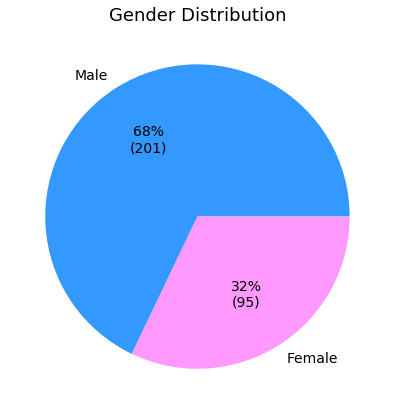

In [84]:
gender_counts = heart_data['Sex'].value_counts()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(7,7))
plt.pie(gender_counts, labels=['Male', 'Female'], colors=['#3399FF', '#FF99FF'], autopct=make_autopct(gender_counts), textprops={'size':14})
plt.title('Gender Distribution', fontdict={'fontsize':18})

target_counts = heart_data['Target'].value_counts()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(7,7))
plt.pie(target_counts, labels=['Disease', 'No Disease'], colors = ['#FF3333', '#3399FF'],
        autopct=make_autopct(gender_counts), textprops={'size':14})
plt.title('Disease Presence Distribution', fontdict={'fontsize':18})

Correlation coefficient: 0.2


Text(0.5, 1.0, 'Age vs. Cholesterol (mg/dl)')

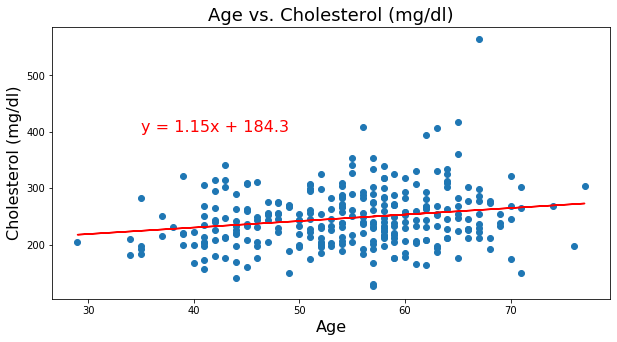

In [102]:
cholesterol = heart_data['Cholesterol (mg/dl)']
age = heart_data['Age']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(age, cholesterol)
regress_values = age * slope + intercept
print(f'Correlation coefficient: {round(rvalue,2)}')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

plt.figure(figsize = (10,5))
plt.scatter(age, cholesterol)
plt.plot(age, regress_values, "r-")
plt.annotate(line_eq, (35, 400), fontsize=16, color='red')
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Cholesterol (mg/dl)', fontsize = 16)
plt.title('Age vs. Cholesterol (mg/dl)', fontsize = 18)